# Prueba para joint 7 con movimiento sinusoidal frecuencia constante
## Coding
### Importando librerías


In [1]:
#importing all libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, LeakyReLU

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Loading data

In [4]:
df = pd.read_csv('training_data_random.csv')
df_val = pd.read_csv('validation_data_1.csv')

# Define datos
joint_name = 'j4'
joint_desired_name = 'jd4'
effort_desired_name = 'e4'
velocity_name = 'v4'

joint = df[joint_name]
joint_desired = df[joint_desired_name]
effort_desired = df[effort_desired_name]
velocity = df[velocity_name]

inicio = 0
final = 3000


# x_train, y_train
(number_training_data, _) = df.shape
q_tmp = df[joint_name].values.reshape(number_training_data,1)
T_tmp = df[effort_desired_name].values.reshape(number_training_data,1)
v_tmp = df[velocity_name].values.reshape(number_training_data,1)
qd_tmp = df[joint_desired_name]
x_train = np.concatenate([q_tmp, v_tmp, T_tmp], axis =1)
y_train = qd_tmp.values.reshape(number_training_data,1)

(number_validation_data, _) = df_val.shape
q_tmp = df_val[joint_name].values.reshape(number_validation_data,1)
T_tmp = df_val[effort_desired_name].values.reshape(number_validation_data,1)
v_tmp = df_val[velocity_name].values.reshape(number_validation_data,1)
qd_tmp = df_val[joint_desired_name]

x_val = np.concatenate([q_tmp, v_tmp, T_tmp], axis =1)
y_val = qd_tmp.values.reshape(number_validation_data,1)


## Plotting data

### Muestra de data para una ventana de 3000 datos

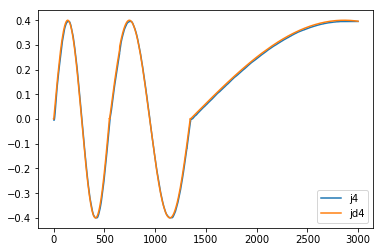

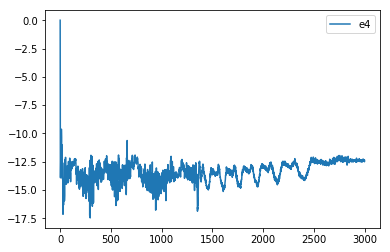

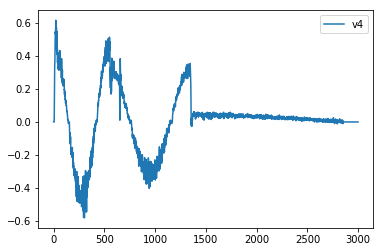

In [5]:
fig1 = plt.figure()
joint[inicio:final].plot()
joint_desired[inicio:final].plot(); plt.legend(loc='best')
fig2 = plt.figure(); effort_desired[inicio:final].plot(); plt.legend(loc='best')
fig21 = plt.figure(); velocity[inicio:final].plot(); plt.legend(loc='best')

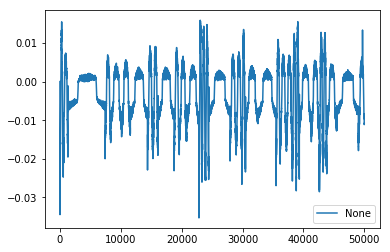

In [6]:
delta_joint = joint - joint_desired
fig3 = plt.figure(); delta_joint.plot(); plt.legend(loc='best')
#delta_j7.head()
df['delta_joint'] = delta_joint

### Plotting delta rad vs effort

<Figure size 432x288 with 0 Axes>

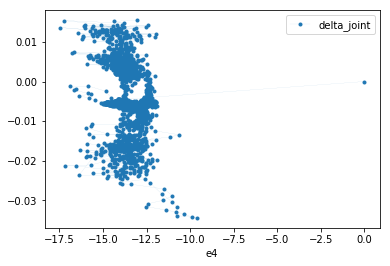

In [7]:
fig4 = plt.figure(); df[inicio:final].plot(x = effort_desired_name, y = 'delta_joint', marker='.',lw=0.05); plt.legend(loc='best')

### Prueba de validación para modelo FFNN
#### Solo Neuronas Lineales (model1)
Se utiliza un modelo de 1 input layer de 15 neuronas lineales, 2 hidden layers de 15 neuronas lineales y 1 output layer de 2 neuronas lineales.  

In [8]:
# Generating model
model1 = Sequential()
model1.add(Dense(units=40, activation='linear', input_dim=3))
model1.add(Dense(units=40, activation='linear'))
model1.add(Dense(units=40, activation='tanh'))
model1.add(Dense(units=40, activation='linear'))
model1.add(Dense(units=1, activation='linear'))

model1.compile(loss='mean_squared_error',
              optimizer='Adam',
              metrics=['accuracy'])

#### Feeding data

In [50]:
model1.fit(x_train, y_train, epochs=10, batch_size=50)

Epoch 1/10
3501/3501 [==============================] - 1s 264us/step - loss: 0.4959 - acc: 2.8563e-04 0s - loss: 0.7723 - acc: 4.6512e
Epoch 2/10
3501/3501 [==============================] - 0s 96us/step - loss: 0.0066 - acc: 2.8563e-04
Epoch 3/10
3501/3501 [==============================] - 0s 105us/step - loss: 9.7606e-05 - acc: 2.8563e-04
Epoch 4/10
3501/3501 [==============================] - 0s 88us/step - loss: 7.5139e-05 - acc: 2.8563e-04
Epoch 5/10
3501/3501 [==============================] - 0s 86us/step - loss: 6.8617e-05 - acc: 2.8563e-04
Epoch 6/10
3501/3501 [==============================] - 0s 102us/step - loss: 6.5632e-05 - acc: 2.8563e-04
Epoch 7/10
3501/3501 [==============================] - 0s 96us/step - loss: 6.7342e-05 - acc: 2.8563e-04
Epoch 8/10
3501/3501 [==============================] - 0s 95us/step - loss: 5.8594e-05 - acc: 2.8563e-04
Epoch 9/10
3501/3501 [==============================] - 0s 99us/step - loss: 9.1826e-05 - acc: 2.8563e-04
Epoch 10/10
3501/3

In [51]:
y1_pred = model1.predict(x_val)
df_val['y1_pred'] = y1_pred

<Figure size 432x288 with 0 Axes>

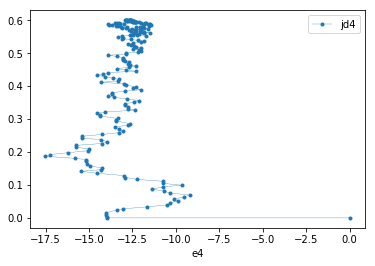

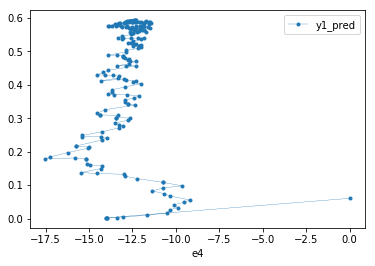

<Figure size 432x288 with 0 Axes>

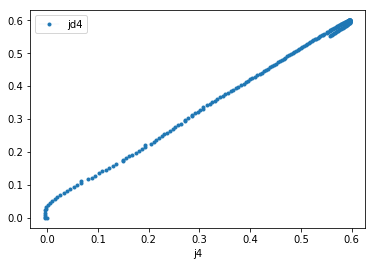

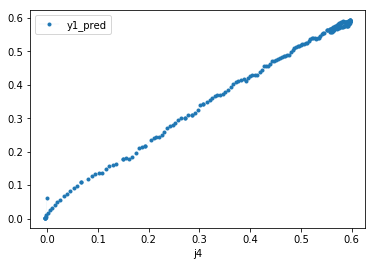

<Figure size 432x288 with 0 Axes>

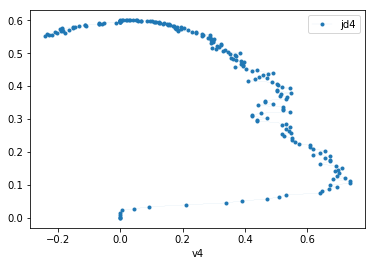

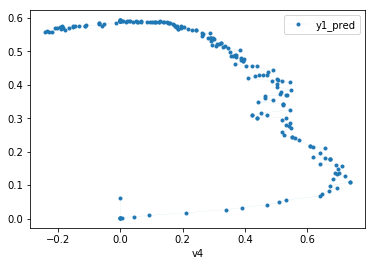

In [52]:
fig5 = plt.figure(); df_val[0:200].plot(x = effort_desired_name, y = joint_desired_name, marker='.',lw=0.3)
df_val[0:200].plot(x = effort_desired_name, y = 'y1_pred', marker='.',lw=0.3); plt.legend(loc='best')

fig6 = plt.figure(); df_val[0:200].plot(x = joint_name, y = joint_desired_name, marker='.',lw=0.05)
df_val[0:200].plot(x = joint_name, y = 'y1_pred', marker='.',lw=0.05); plt.legend(loc='best')

fig6 = plt.figure(); df_val[0:200].plot(x = velocity_name, y = joint_desired_name, marker='.',lw=0.05)
df_val[0:200].plot(x = velocity_name, y = 'y1_pred', marker='.',lw=0.05); plt.legend(loc='best')

### Neuronas  con función de activación sigmoid
Se utiliza un modelo de 1 input layer de 20 neuronas lineales, 2 hidden layers de 20 neuronas sigmoides y 1 output layer de 2 neuronas lineales.  

In [19]:
model2 = Sequential()
model2.add(Dense(units=40, activation='linear', input_dim=3))
model2.add(Dense(units=40, activation='sigmoid'))
model2.add(Dense(units=40, activation='sigmoid'))
model2.add(Dense(units=1, activation='linear'))

model2.compile(loss='mean_squared_error',
              optimizer='Adam',
              metrics=['accuracy'])


#### Feeding data

In [49]:
model2.fit(x_train, y_train, epochs=10, batch_size=50)

Epoch 1/10
3501/3501 [==============================] - 1s 296us/step - loss: 0.0714 - acc: 2.8563e-04
Epoch 2/10
3501/3501 [==============================] - 0s 85us/step - loss: 0.0147 - acc: 2.8563e-04
Epoch 3/10
3501/3501 [==============================] - 0s 89us/step - loss: 1.9370e-04 - acc: 2.8563e-04
Epoch 4/10
3501/3501 [==============================] - 0s 92us/step - loss: 8.9544e-05 - acc: 2.8563e-04
Epoch 5/10
3501/3501 [==============================] - 0s 77us/step - loss: 4.2945e-05 - acc: 2.8563e-04
Epoch 6/10
3501/3501 [==============================] - 0s 104us/step - loss: 2.7431e-05 - acc: 2.8563e-04
Epoch 7/10
3501/3501 [==============================] - 0s 109us/step - loss: 2.3555e-05 - acc: 2.8563e-04
Epoch 8/10
3501/3501 [==============================] - 0s 93us/step - loss: 2.2734e-05 - acc: 2.8563e-04
Epoch 9/10
3501/3501 [==============================] - 0s 119us/step - loss: 2.2071e-05 - acc: 2.8563e-04
Epoch 10/10
3501/3501 [===========================

In [50]:
y2_pred = model2.predict(x_val)

In [51]:
df_val['y2_pred'] = y2_pred

<Figure size 432x288 with 0 Axes>

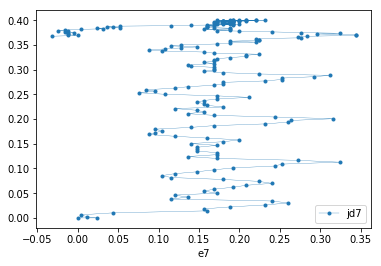

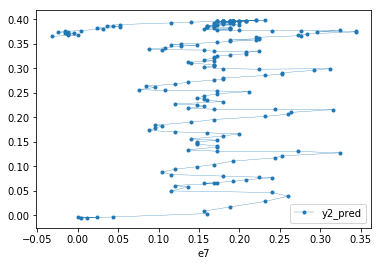

<Figure size 432x288 with 0 Axes>

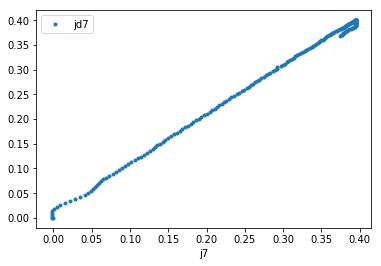

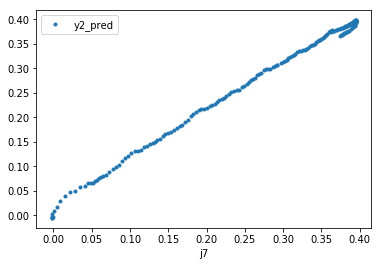

<Figure size 432x288 with 0 Axes>

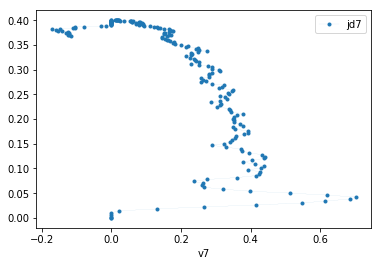

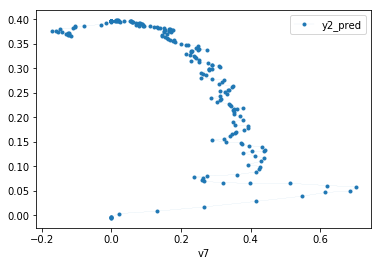

In [52]:
fig8 = plt.figure(); df_val[0:200].plot(x = effort_desired_name, y = joint_desired_name, marker='.',lw=0.3)
df_val[0:200].plot(x = effort_desired_name, y = 'y2_pred', marker='.',lw=0.3); plt.legend(loc='best')

fig9 = plt.figure(); df_val[0:200].plot(x = joint_name, y = joint_desired_name, marker='.',lw=0.05)
df_val[0:200].plot(x = joint_name, y = 'y2_pred', marker='.',lw=0.05); plt.legend(loc='best')

fig10 = plt.figure(); df_val[0:200].plot(x = velocity_name, y = joint_desired_name, marker='.',lw=0.05)
df_val[0:200].plot(x = velocity_name, y = 'y2_pred', marker='.',lw=0.05); plt.legend(loc='best')

### Neuronas  con función de activación tanh
Se utiliza un modelo de 1 input layer de 20 neuronas lineales, 2 hidden layers de 20 neuronas tanh y 1 output layer de 2 neuronas lineales.  

In [28]:
model3 = Sequential()
model3.add(Dense(units=40, activation='linear', input_dim=3))
model3.add(Dense(units=40, activation='tanh'))
model3.add(Dense(units=40, activation='tanh'))
model3.add(Dense(units=1, activation='linear'))

model3.compile(loss='mean_squared_error',
              optimizer='Adam',
              metrics=['accuracy'])


In [29]:
model3.fit(x_train, y_train, epochs=10, batch_size=50)

Epoch 1/10
3501/3501 [==============================] - 1s 182us/step - loss: 7.2289e-04 - acc: 2.8563e-04
Epoch 2/10
3501/3501 [==============================] - 0s 101us/step - loss: 3.4218e-06 - acc: 2.8563e-04
Epoch 3/10
3501/3501 [==============================] - 0s 83us/step - loss: 2.9630e-06 - acc: 2.8563e-04
Epoch 4/10
3501/3501 [==============================] - 0s 81us/step - loss: 3.0143e-06 - acc: 2.8563e-04
Epoch 5/10
3501/3501 [==============================] - 0s 90us/step - loss: 2.9202e-06 - acc: 2.8563e-04
Epoch 6/10
3501/3501 [==============================] - 0s 85us/step - loss: 3.3174e-06 - acc: 2.8563e-04
Epoch 7/10
3501/3501 [==============================] - 0s 87us/step - loss: 3.0587e-06 - acc: 2.8563e-04
Epoch 8/10
3501/3501 [==============================] - 0s 93us/step - loss: 3.0148e-06 - acc: 2.8563e-04
Epoch 9/10
3501/3501 [==============================] - 0s 86us/step - loss: 3.4745e-06 - acc: 2.8563e-04
Epoch 10/10
3501/3501 [=====================

In [30]:
y3_pred = model3.predict(x_val)
df_val['y3_pred'] = y3_pred


<Figure size 432x288 with 0 Axes>

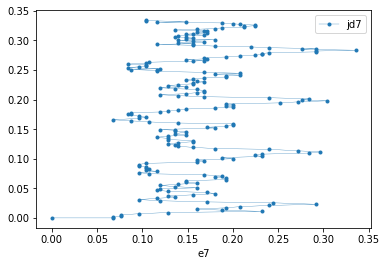

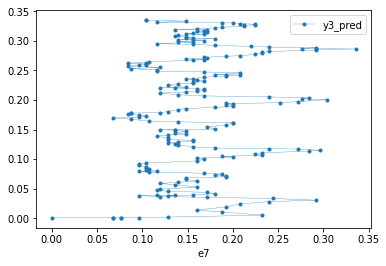

<Figure size 432x288 with 0 Axes>

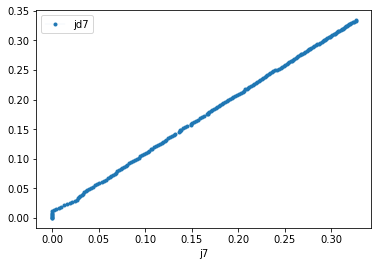

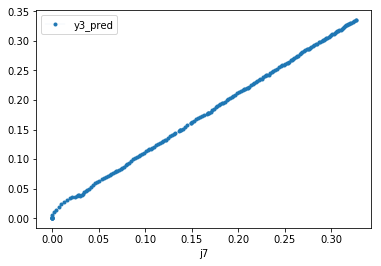

<Figure size 432x288 with 0 Axes>

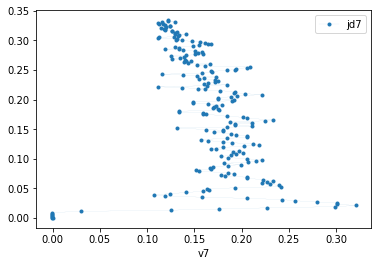

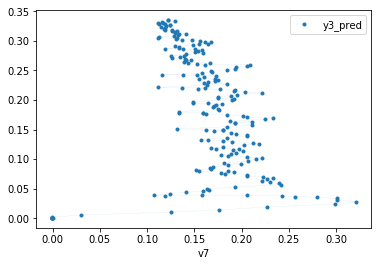

In [31]:
fig11 = plt.figure(); df_val[0:200].plot(x = effort_desired_name, y = joint_desired_name, marker='.',lw=0.3)
df_val[0:200].plot(x = effort_desired_name, y = 'y3_pred', marker='.',lw=0.3); plt.legend(loc='best')

fig12 = plt.figure(); df_val[0:200].plot(x = joint_name, y = joint_desired_name, marker='.',lw=0.05)
df_val[0:200].plot(x = joint_name, y = 'y3_pred', marker='.',lw=0.05); plt.legend(loc='best')

fig13 = plt.figure(); df_val[0:200].plot(x = velocity_name, y = joint_desired_name, marker='.',lw=0.05)
df_val[0:200].plot(x = velocity_name, y = 'y3_pred', marker='.',lw=0.05); plt.legend(loc='best')

### Neuronas  con función de activación elu (model 4)
Se utiliza un modelo de 1 input layer de 20 neuronas lineales, 2 hidden layers de 20 neuronas elu y 1 output layer de 2 neuronas lineales.  

In [9]:
model4 = Sequential()
model4.add(Dense(units=40, activation='linear', input_dim=3,use_bias=True))
model4.add(Dense(units=40, activation='elu',use_bias=True))
model4.add(Dense(units=40, activation='elu',use_bias=True))
model4.add(Dense(units=1, activation='linear',use_bias=True))

model4.compile(loss='mean_squared_error',
              optimizer='Adam',
              metrics=['accuracy'])

In [11]:
model4.fit(x_train, y_train, epochs=30, batch_size=50)

Epoch 1/30
50001/50001 [==============================] - 3s 57us/step - loss: 6.9438e-05 - acc: 2.0000e-05
Epoch 2/30
50001/50001 [==============================] - 3s 56us/step - loss: 5.6101e-05 - acc: 2.0000e-05
Epoch 3/30
50001/50001 [==============================] - 3s 56us/step - loss: 5.5842e-05 - acc: 2.0000e-05
Epoch 4/30
50001/50001 [==============================] - 3s 58us/step - loss: 5.7453e-05 - acc: 2.0000e-05
Epoch 5/30
50001/50001 [==============================] - 3s 56us/step - loss: 4.0214e-05 - acc: 2.0000e-05
Epoch 6/30
50001/50001 [==============================] - 3s 55us/step - loss: 4.3291e-05 - acc: 2.0000e-05
Epoch 7/30
50001/50001 [==============================] - 3s 55us/step - loss: 3.8529e-05 - acc: 2.0000e-05
Epoch 8/30
50001/50001 [==============================] - 3s 57us/step - loss: 4.0201e-05 - acc: 2.0000e-05
Epoch 9/30
50001/50001 [==============================] - 3s 56us/step - loss: 3.8587e-05 - acc: 2.0000e-05
Epoch 10/30
50001/50001 [===

In [12]:
y4_pred = model4.predict(x_val)
df_val['y4_pred'] = y4_pred


<Figure size 432x288 with 0 Axes>

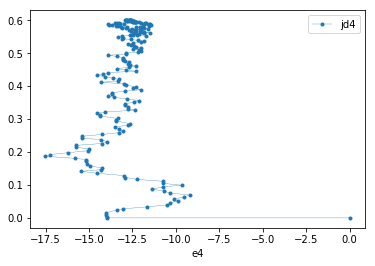

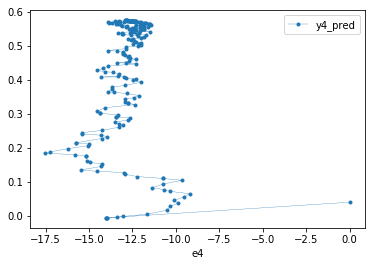

<Figure size 432x288 with 0 Axes>

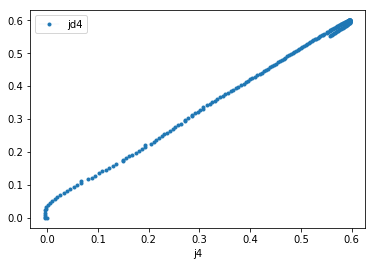

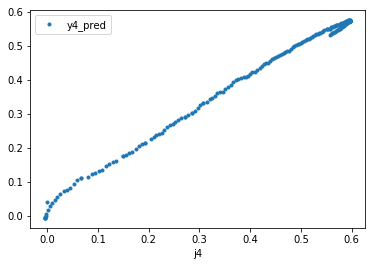

<Figure size 432x288 with 0 Axes>

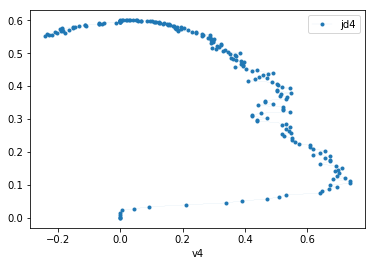

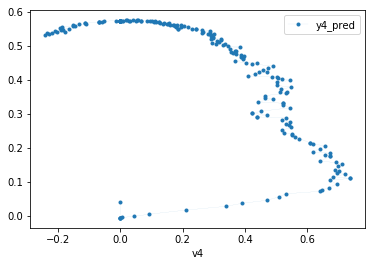

In [13]:
fig14 = plt.figure(); df_val[0:200].plot(x = effort_desired_name, y = joint_desired_name, marker='.',lw=0.3)
df_val[0:200].plot(x = effort_desired_name, y = 'y4_pred', marker='.',lw=0.3); plt.legend(loc='best')

fig15 = plt.figure(); df_val[0:200].plot(x = joint_name, y = joint_desired_name, marker='.',lw=0.05)
df_val[0:200].plot(x = joint_name, y = 'y4_pred', marker='.',lw=0.05); plt.legend(loc='best')

fig16 = plt.figure(); df_val[0:200].plot(x = velocity_name, y = joint_desired_name, marker='.',lw=0.05)
df_val[0:200].plot(x = velocity_name, y = 'y4_pred', marker='.',lw=0.05); plt.legend(loc='best')

### Neuronas  con función de activación LeakyReLU (model 5)
Se utiliza un modelo de 1 input layer de 20 neuronas lineales, 2 hidden layers de 20 neuronas LeakyReLU y 1 output layer de 2 neuronas lineales.  

In [36]:
model5 = Sequential()
model5.add(Dense(units=40, activation='linear', input_dim=3))
model5.add(Dense(units=40, activation=LeakyReLU(alpha=0.3)))
model5.add(Dense(units=40, activation=LeakyReLU(alpha=0.3)))
model5.add(Dense(units=1, activation='linear'))

model5.compile(loss='mean_squared_error',
              optimizer='Adam',
              metrics=['accuracy'])

/usr/local/lib/python2.7/dist-packages/keras/activations.py:197: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


In [37]:
model5.fit(x_train, y_train, epochs=10, batch_size=50)

Epoch 1/10
3501/3501 [==============================] - 1s 231us/step - loss: 0.0065 - acc: 2.8563e-04
Epoch 2/10
3501/3501 [==============================] - 0s 84us/step - loss: 3.3857e-05 - acc: 2.8563e-04
Epoch 3/10
3501/3501 [==============================] - 0s 101us/step - loss: 1.3162e-05 - acc: 2.8563e-04
Epoch 4/10
3501/3501 [==============================] - 0s 101us/step - loss: 8.3109e-06 - acc: 2.8563e-04
Epoch 5/10
3501/3501 [==============================] - 0s 71us/step - loss: 6.8278e-06 - acc: 2.8563e-04
Epoch 6/10
3501/3501 [==============================] - 0s 87us/step - loss: 5.5665e-06 - acc: 2.8563e-04
Epoch 7/10
3501/3501 [==============================] - 0s 99us/step - loss: 4.6989e-06 - acc: 2.8563e-04
Epoch 8/10
3501/3501 [==============================] - 0s 93us/step - loss: 4.0691e-06 - acc: 2.8563e-04
Epoch 9/10
3501/3501 [==============================] - 0s 96us/step - loss: 3.6839e-06 - acc: 2.8563e-04
Epoch 10/10
3501/3501 [========================

In [38]:
y5_pred = model5.predict(x_val)
df_val['y5_pred'] = y5_pred


<Figure size 432x288 with 0 Axes>

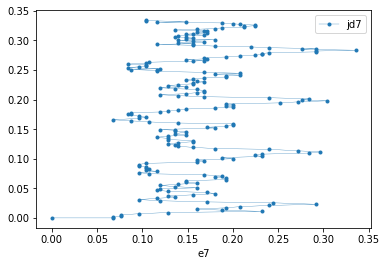

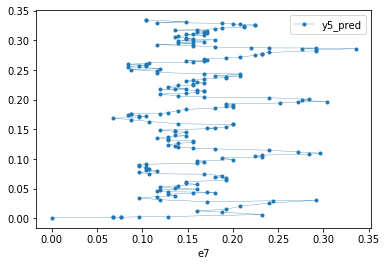

<Figure size 432x288 with 0 Axes>

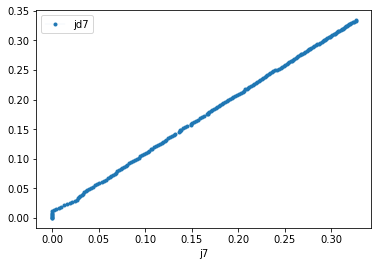

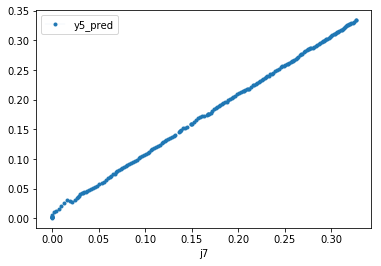

<Figure size 432x288 with 0 Axes>

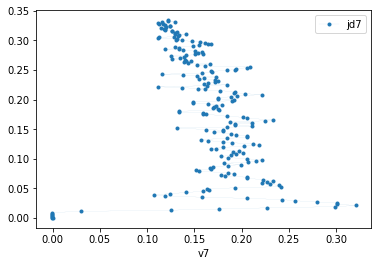

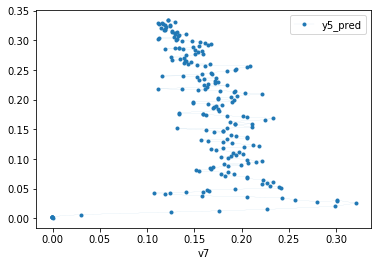

In [39]:
fig19 = plt.figure(); df_val[0:200].plot(x = effort_desired_name, y = joint_desired_name, marker='.',lw=0.3)
df_val[0:200].plot(x = effort_desired_name, y = 'y5_pred', marker='.',lw=0.3); plt.legend(loc='best')

fig20 = plt.figure(); df_val[0:200].plot(x = joint_name, y = joint_desired_name, marker='.',lw=0.05)
df_val[0:200].plot(x = joint_name, y = 'y5_pred', marker='.',lw=0.05); plt.legend(loc='best')

fig21 = plt.figure(); df_val[0:200].plot(x = velocity_name, y = joint_desired_name, marker='.',lw=0.05)
df_val[0:200].plot(x = velocity_name, y = 'y5_pred', marker='.',lw=0.05); plt.legend(loc='best')

<Figure size 432x288 with 0 Axes>

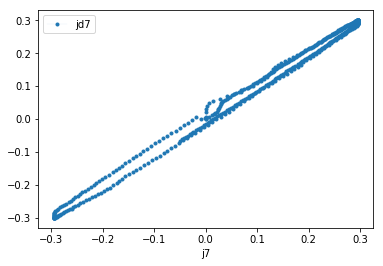

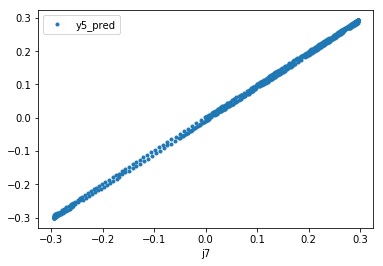